In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#

    id: Unique ID for the customer
    Gender: Gender of the customer
    Age: Age of the customer
    Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
    Region_Code: Unique code for the region of the customer
    Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
    Vehicle_Age: Age of the Vehicle
    Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
    Annual_Premium: The amount customer needs to pay as premium in the year
    Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
    Vintage: Number of Days, Customer has been associated with the company
    Response: [1 : Customer is interested, 0 : Customer is not interested]




In [10]:
df.shape

(381109, 12)

In [11]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [13]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [14]:
# checking distribution for target column
df['Response'].value_counts()


Response
0    334399
1     46710
Name: count, dtype: int64

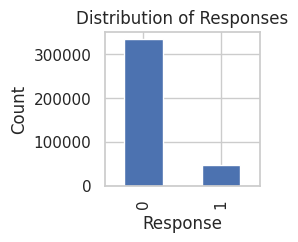

In [15]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(2, 2))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

# Show the plot
plt.show()

<Axes: >

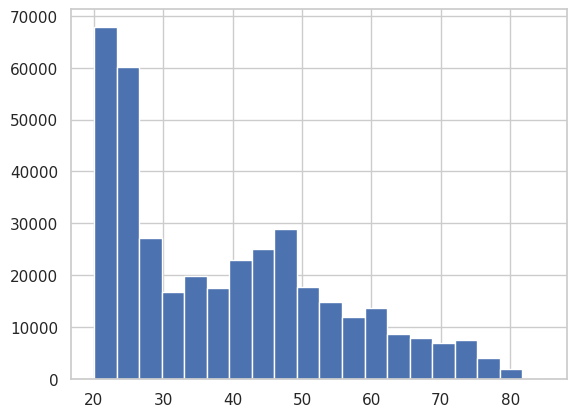

In [16]:
df['Age'].hist(bins=20)

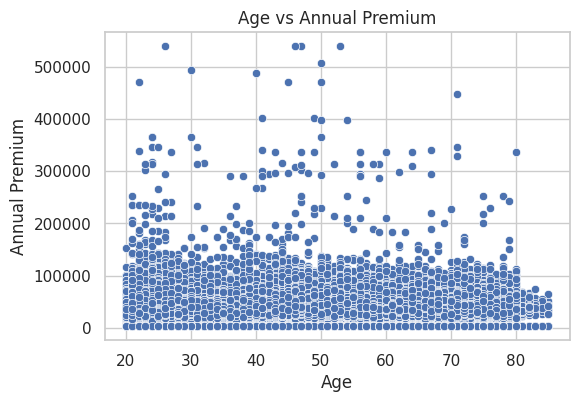

In [17]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

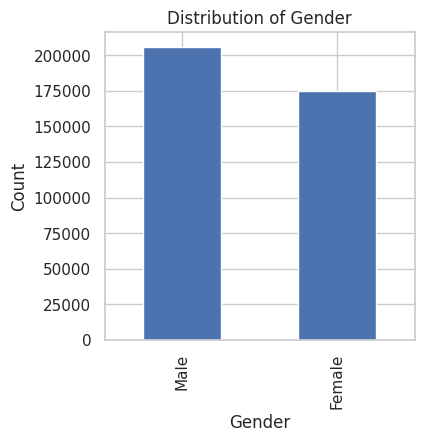

In [18]:
# Gender-Response comparison

value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()


In [ ]:
data = df.groupby(['Gender','Response'])

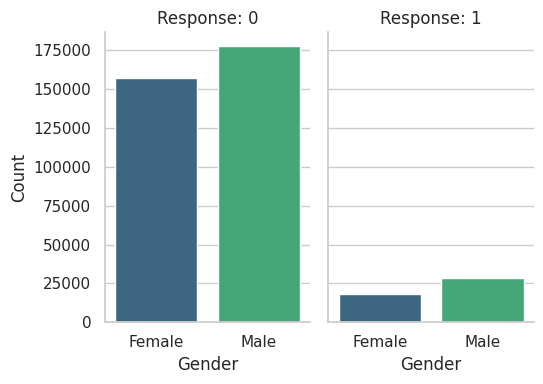

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Gender' and 'Response', count occurrences of 'id'
data = df.groupby(['Gender', 'Response'], as_index=False)['id'].count().rename(columns={'id': 'count'})

# Create a bar plot
g = sns.catplot(x="Gender", y="count", col="Response", data=data, kind="bar", height=4, aspect=.7, palette="viridis")

# Improve labels and formatting
g.set_axis_labels("Gender", "Count").set_titles("Response: {col_name}")

plt.show()


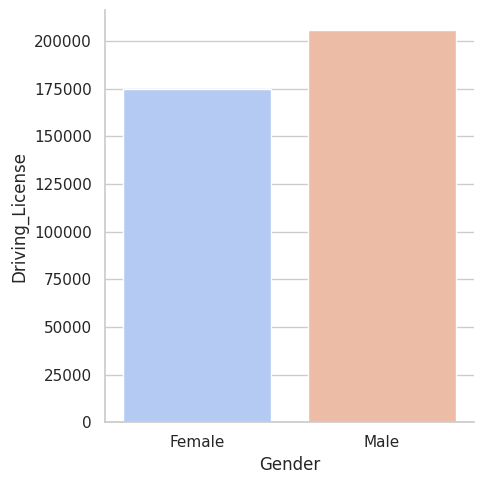

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Gender and count Driving_License occurrences
data = df.groupby('Gender', as_index=False)['Driving_License'].count()

# Create bar plot
sns.catplot(x="Gender", y="Driving_License", data=data, kind="bar", palette="coolwarm")

# Show the plot
plt.show()


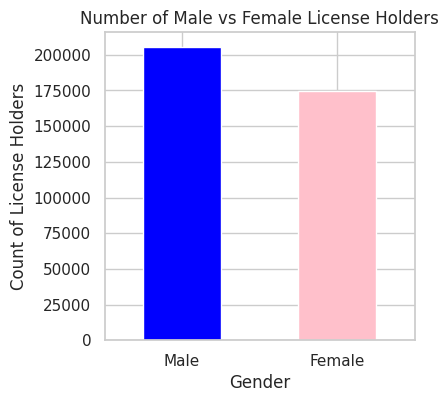

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only license holders
gender_counts = df[df['Driving_License'] == 1]['Gender'].value_counts()

# Plot
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()


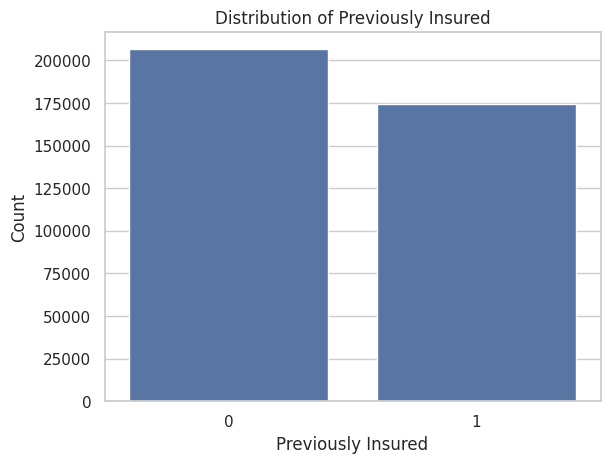

In [23]:
# customers with existing insurance

sns.countplot(x="Previously_Insured", data=df)
plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()


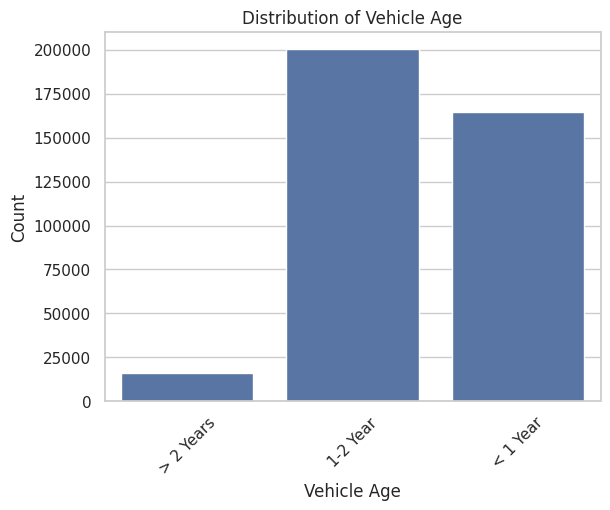

In [25]:
# checking vehicle age dist

sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

In [26]:
# Response vs Vehicle_Age

data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


In [27]:
data = df.groupby(['Vehicle_Age', 'Response'], as_index=False)['id'].count().rename(columns={'id': 'count'})


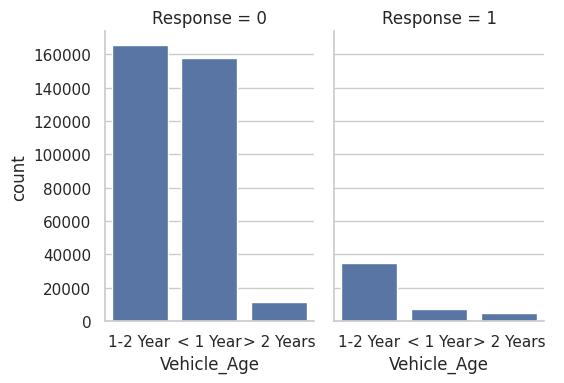

In [28]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=data, kind="bar",
                height=4, aspect=.7);

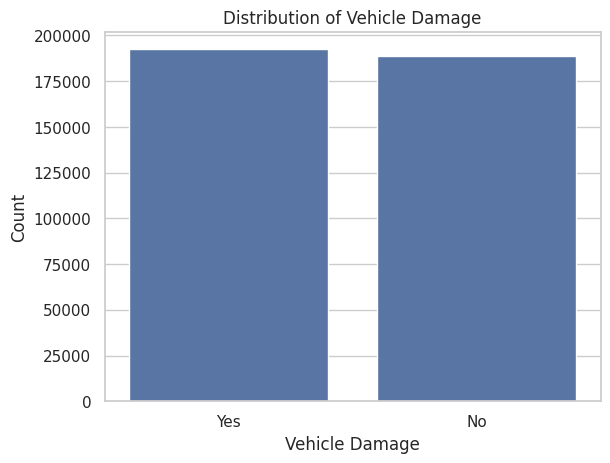

In [29]:
# dist for Vehicle_Damage col

sns.countplot(data=df, x='Vehicle_Damage')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()


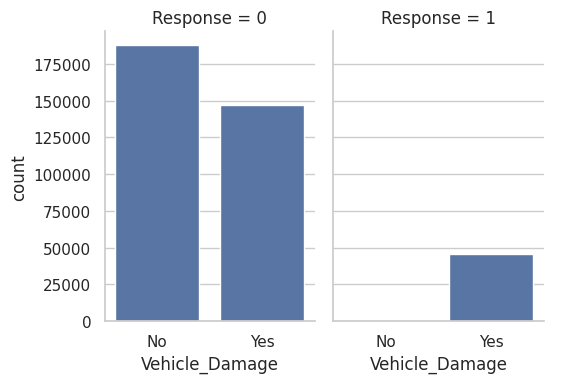

In [30]:
data = df.groupby(['Vehicle_Damage', 'Response'], as_index=False)['id'].count().rename(columns={'id': 'count'})

g = sns.catplot(
    x="Vehicle_Damage", 
    y="count", 
    col="Response", 
    data=data, 
    kind="bar", 
    height=4, 
    aspect=0.7  # Assuming you meant 'aspect'
)


In [31]:
# checking stats for Annual_Premium
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

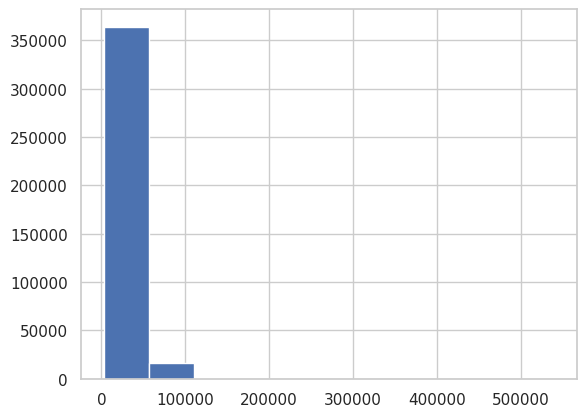

In [32]:
df['Annual_Premium'].hist(bins=10)

<Axes: >

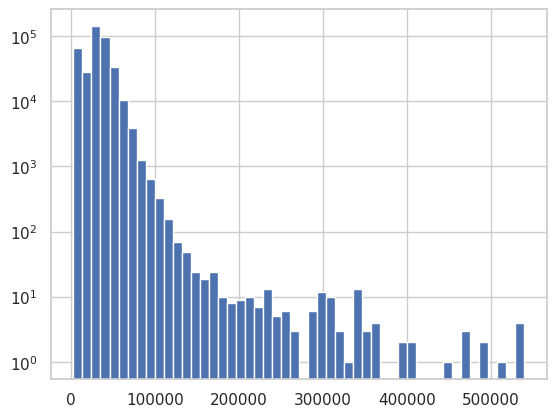

In [34]:
df['Annual_Premium'].hist(bins=50, log=True)


In [33]:
df[df['Annual_Premium']>200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


# 1️⃣ Detect Outliers Using IQR (Interquartile Range)

In [35]:
Q1 = df['Annual_Premium'].quantile(0.25)  # 25th percentile
Q3 = df['Annual_Premium'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Annual_Premium'] < lower_bound) | (df['Annual_Premium'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 10320


# 2️⃣ Visualizing Outliers Using a Box Plot

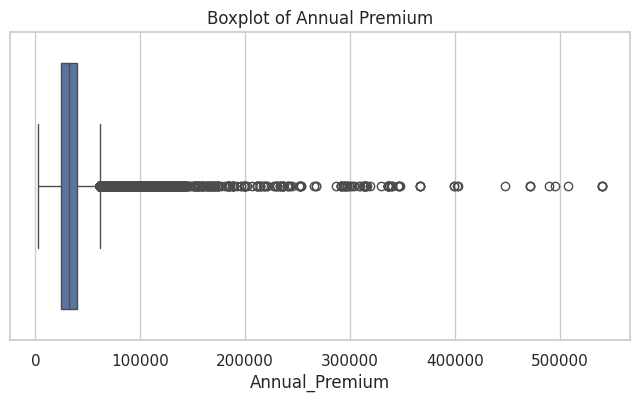

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Annual_Premium'])
plt.title('Boxplot of Annual Premium')
plt.show()


# Data Preprocessing

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [39]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [40]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [45]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [46]:
df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [51]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [52]:
print(df.columns)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Vehicle_Age_lt_1_Year',
       'Vehicle_Age_gt_2_Years', 'Vehicle_Damage_Yes'],
      dtype='object')


In [54]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)


In [55]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)


In [56]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm

# Define hyperparameter grid for Randomized Search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [5, 7, 10],
    'n_estimators': [300]
}

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=101)

# Initialize RandomizedSearchCV
n_iter = 10  # Number of parameter settings sampled
rf_random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=n_iter,   # Number of parameter settings sampled
    cv=4,            # 4-fold cross-validation
    verbose=1,
    random_state=101,
          # Use all CPU cores for parallel processing
)

# Progress bar
with tqdm(total=n_iter, desc="RandomizedSearch Progress") as pbar:
    for _ in range(n_iter):
        rf_random_search.fit(x_train, y_train)
        pbar.update()

# Print the best parameters
print("Best Parameters:", rf_random_search.best_params_)

# Get the best model
best_rf_model = rf_random_search.best_estimator_


RandomizedSearch Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  10%|█         | 1/10 [16:26<2:27:56, 986.26s/it]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  20%|██        | 2/10 [32:21<2:09:05, 968.19s/it]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  30%|███       | 3/10 [48:53<1:54:12, 978.92s/it]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  40%|████      | 4/10 [1:05:18<1:38:07, 981.29s/it]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  50%|█████     | 5/10 [1:20:25<1:19:32, 954.58s/it]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  60%|██████    | 6/10 [1:34:13<1:00:46, 911.53s/it]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  70%|███████   | 7/10 [1:48:03<44:14, 884.96s/it]  

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  80%|████████  | 8/10 [2:01:27<28:38, 859.09s/it]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress:  90%|█████████ | 9/10 [2:14:48<14:00, 840.88s/it]

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearch Progress: 100%|██████████| 10/10 [2:28:10<00:00, 889.01s/it]

Best Parameters: {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm  # Import tqdm

# Define the parameter grid
my_params = {
    'n_estimators': [300],  # Make this iterable
    'min_samples_split': [7],
    'min_samples_leaf': [6],
    'max_depth': [10],
    'criterion': ['entropy']
}

# Initialize the classifier
clf = RandomForestClassifier()

# Initialize RandomizedSearchCV
model = RandomizedSearchCV(estimator=clf, param_distributions=my_params, n_iter=10, 
                           cv=4, verbose=1, random_state=101, n_jobs=-1)

# Wrap the fitting process with tqdm for progress tracking
for _ in tqdm(range(10), desc="Hyperparameter Search Progress"):
    model.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", model.best_params_)


Hyperparameter Search Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  10%|█         | 1/10 [01:54<17:09, 114.40s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  20%|██        | 2/10 [03:38<14:28, 108.55s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  30%|███       | 3/10 [05:36<13:08, 112.68s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  40%|████      | 4/10 [07:39<11:41, 116.94s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  50%|█████     | 5/10 [09:32<09:36, 115.28s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  60%|██████    | 6/10 [11:20<07:31, 112.84s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  70%|███████   | 7/10 [13:06<05:31, 110.65s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  80%|████████  | 8/10 [14:48<03:36, 108.01s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress:  90%|█████████ | 9/10 [16:36<01:47, 107.93s/it]

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Hyperparameter Search Progress: 100%|██████████| 10/10 [18:24<00:00, 110.42s/it]

Best Parameters: {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [69]:

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [70]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

# Model Evaluation

In [71]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

